In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import itertools
def reshpe_12(arr):
    result = np.concatenate([arr[i] for i in range(0, arr.shape[0], 12)], axis=0)
    return result
# 读取 npz 文件
preds = np.load('y_preds_METR.npz')['arr_0']
truths=np.load("y_truths_METR.npz")['arr_0']
# 打印转换后的数组形状

preds = np.transpose(preds, (1, 0, 2))
truths=np.transpose(truths, (1, 0, 2))
preds=reshpe_12(preds)[:864,:]
truths=reshpe_12(truths)[:864,:]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.dates import HourLocator, drange, DateFormatter
import datetime
def visual(true, preds=None, name='METR_visual.pdf'):
    """
    Results visualization
    """   
    plot_true = np.transpose(true)
    plot_preds = np.transpose(preds)
    
    # 生成日期范围，每个点表示五分钟
    start_date = datetime.datetime(2012, 3, 1, 0, 0)
    end_date = datetime.datetime(2012, 3, 4) 
    date_range = drange(start_date, end_date, delta = datetime.timedelta(minutes=5))
    with PdfPages(name) as pdf:
        for i in range(plot_true.shape[0]):
            a = plot_true[i]
            b = plot_preds[i] if preds is not None else None
            
            plt.figure(figsize=(25, 10))
            plt.xlabel('Time')
            plt.ylabel('Speed(miles/hour)')
            plt.plot(date_range, a, label='GroundTruth', linewidth=2)
            
            if preds is not None:
                plt.plot(date_range, b, label='Prediction', linewidth=2)
            
            # 设置横轴标签格式和刻度间隔
            plt.gca().xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))
            locator = HourLocator(interval=12)
            
            plt.gca().xaxis.set_major_locator(locator)
            plt.grid(True)
            plt.legend()
            
            pdf.savefig()
            plt.close()

In [5]:
visual(truths,preds)

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',family='FangSong')
def heat_map_visual(adj_mx, preds,idfrom,idto):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # 绘制adj_mx热力图
    sns.heatmap(adj_mx[idfrom:idto,idfrom:idto], cmap='YlGnBu', ax=axes[0])
    axes[0].set_xlabel('传感器索引')
    axes[0].set_ylabel('传感器索引')
    
    # 绘制preds热力图
    sns.heatmap(preds[idfrom:idto,idfrom:idto], cmap='YlGnBu', ax=axes[1])
    axes[1].set_xlabel('传感器索引')
    axes[1].set_ylabel('传感器索引')
    
    # 调整子图之间的间距
    plt.tight_layout()
    
    # 显示热力图
    plt.show()

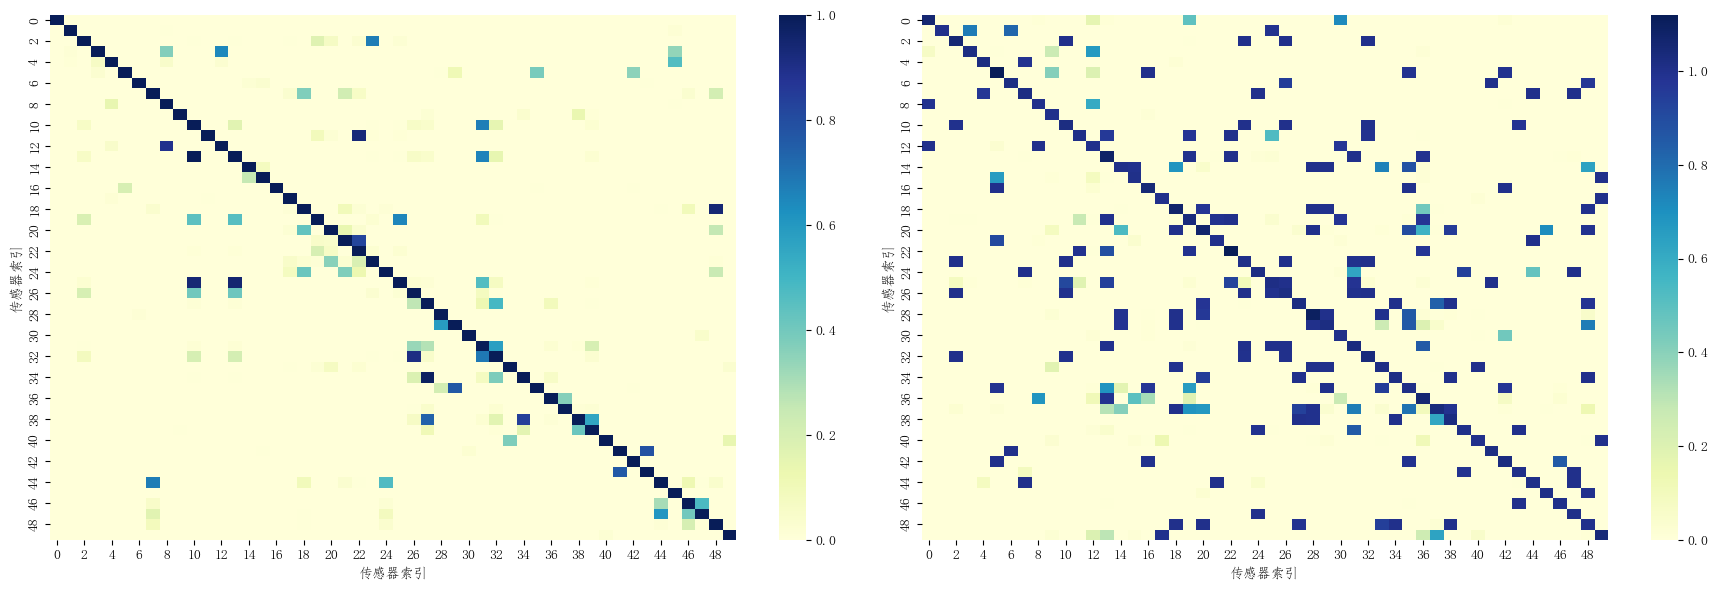

In [7]:
import pickle
# 打开.pkl文件
with open('adj_mat.pkl', 'rb') as f:
    # 使用pickle.load()函数加载数据
    data = pickle.load(f)

# 读取数据
sensor_ids, sensor_id_to_ind, adj_mx = data
preds = np.load('pred_adj.npz')['arr_0']+np.eye(207)

heat_map_visual(adj_mx,preds,50,100)
